In [279]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
from scipy.stats import skew
warnings.filterwarnings('ignore')

In [280]:
df=pd.read_csv('Hepatits.csv')
df

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [281]:
df.shape

(155, 20)

In [282]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [283]:
df.index

RangeIndex(start=0, stop=155, step=1)

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Class             155 non-null    int64 
 1   AGE               155 non-null    int64 
 2   SEX               155 non-null    int64 
 3   STEROID           155 non-null    object
 4   ANTIVIRALS        155 non-null    int64 
 5   FATIGUE           155 non-null    object
 6   MALAISE           155 non-null    object
 7   ANOREXIA          155 non-null    object
 8   LIVER BIG         155 non-null    object
 9   LIVER FIRM        155 non-null    object
 10  SPLEEN PALPABLE   155 non-null    object
 11  SPIDERS           155 non-null    object
 12  ASCITES           155 non-null    object
 13  VARICES           155 non-null    object
 14  BILIRUBIN         155 non-null    object
 15  ALK PHOSPHATE     155 non-null    object
 16   SGOT             155 non-null    object
 17  ALBUMIN         

In [285]:
df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             0
ANTIVIRALS          0
FATIGUE             0
MALAISE             0
ANOREXIA            0
LIVER BIG           0
LIVER FIRM          0
SPLEEN PALPABLE     0
SPIDERS             0
ASCITES             0
VARICES             0
BILIRUBIN           0
ALK PHOSPHATE       0
 SGOT               0
ALBUMIN             0
PROTIME             0
HISTOLOGY           0
dtype: int64

In [286]:
df.dtypes

Class                int64
AGE                  int64
SEX                  int64
STEROID             object
ANTIVIRALS           int64
FATIGUE             object
MALAISE             object
ANOREXIA            object
LIVER BIG           object
LIVER FIRM          object
SPLEEN PALPABLE     object
SPIDERS             object
ASCITES             object
VARICES             object
BILIRUBIN           object
ALK PHOSPHATE       object
 SGOT               object
ALBUMIN             object
PROTIME             object
HISTOLOGY            int64
dtype: object

In [287]:
df.columns

Index(['Class', 'AGE', 'SEX', 'STEROID ', 'ANTIVIRALS ', 'FATIGUE ',
       'MALAISE ', 'ANOREXIA ', 'LIVER BIG ', 'LIVER FIRM ',
       'SPLEEN PALPABLE ', 'SPIDERS ', 'ASCITES ', 'VARICES ', 'BILIRUBIN ',
       'ALK PHOSPHATE ', ' SGOT', 'ALBUMIN ', 'PROTIME', 'HISTOLOGY '],
      dtype='object')

In [288]:
df.nunique()

Class                2
AGE                 49
SEX                  2
STEROID              3
ANTIVIRALS           2
FATIGUE              3
MALAISE              3
ANOREXIA             3
LIVER BIG            3
LIVER FIRM           3
SPLEEN PALPABLE      3
SPIDERS              3
ASCITES              3
VARICES              3
BILIRUBIN           35
ALK PHOSPHATE       84
 SGOT               85
ALBUMIN             30
PROTIME             45
HISTOLOGY            2
dtype: int64

In [289]:
print('before drop duplicates: ',df.shape)
df=df.drop_duplicates()
print('after drop duplicates: ',df.shape)

before drop duplicates:  (155, 20)
after drop duplicates:  (155, 20)


In [290]:
print('This dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This dataset has 155 observations with 20 features.


array([[<AxesSubplot:title={'center':'Class'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'ANTIVIRALS '}>,
        <AxesSubplot:title={'center':'HISTOLOGY '}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

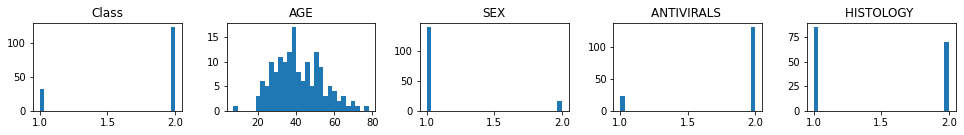

In [291]:
df.hist(figsize=(20,10), grid=False, layout=(5, 6), bins = 30)

In [292]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns

In [293]:
numerical_features

Index(['Class', 'AGE', 'SEX', 'ANTIVIRALS ', 'HISTOLOGY '], dtype='object')

In [294]:
categorical_features

Index(['STEROID ', 'FATIGUE ', 'MALAISE ', 'ANOREXIA ', 'LIVER BIG ',
       'LIVER FIRM ', 'SPLEEN PALPABLE ', 'SPIDERS ', 'ASCITES ', 'VARICES ',
       'BILIRUBIN ', 'ALK PHOSPHATE ', ' SGOT', 'ALBUMIN ', 'PROTIME'],
      dtype='object')

In [295]:
skew_values = skew(df[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,SEX,2.608181
1,AGE,0.361749
4,HISTOLOGY,0.194461
0,Class,-1.450487
3,ANTIVIRALS,-1.908282


<AxesSubplot:xlabel='Class', ylabel='count'>

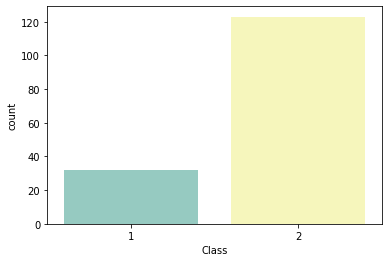

In [296]:
sns.countplot(x = 'Class', data = df, palette="Set3")

<AxesSubplot:xlabel='SEX', ylabel='count'>

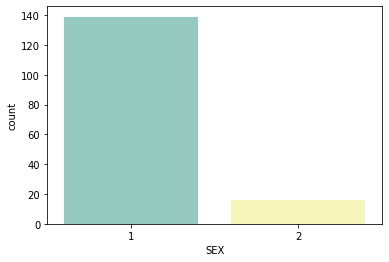

In [297]:
sns.countplot(x = 'SEX', data = df, palette="Set3")

In [298]:
df.replace('?',np.nan,inplace=True)

In [299]:
df.isnull().sum()

Class                0
AGE                  0
SEX                  0
STEROID              1
ANTIVIRALS           0
FATIGUE              1
MALAISE              1
ANOREXIA             1
LIVER BIG           10
LIVER FIRM          11
SPLEEN PALPABLE      5
SPIDERS              5
ASCITES              5
VARICES              5
BILIRUBIN            6
ALK PHOSPHATE       29
 SGOT                4
ALBUMIN             16
PROTIME             67
HISTOLOGY            0
dtype: int64

In [300]:
df['STEROID '].unique()

array(['1', '2', nan], dtype=object)

In [301]:
df['STEROID ']=df['STEROID '].fillna(method='bfill')

In [302]:
df['STEROID ']=df['STEROID '].astype(int)
df['STEROID '].unique()

array([1, 2])

In [303]:
df['FATIGUE '].unique()

array(['2', '1', nan], dtype=object)

In [304]:
df['FATIGUE ']=df['FATIGUE '].fillna(method='bfill')
df['FATIGUE ']=df['FATIGUE '].astype(int)
df['FATIGUE '].unique()

array([2, 1])

In [305]:
df['MALAISE '].unique()

array(['2', '1', nan], dtype=object)

In [306]:
df['MALAISE ']=df['MALAISE '].fillna(method='bfill')
df['MALAISE ']=df['MALAISE '].astype(int)
df['MALAISE '].unique()

array([2, 1])

In [307]:
df['ANOREXIA '].unique()

array(['2', '1', nan], dtype=object)

In [308]:
df['ANOREXIA ']=df['ANOREXIA '].fillna(method='bfill')
df['ANOREXIA ']=df['ANOREXIA '].astype(int)
df['ANOREXIA '].unique()

array([2, 1])

In [309]:
df['LIVER BIG '].unique()

array(['1', '2', nan], dtype=object)

In [310]:
df['LIVER BIG ']=df['LIVER BIG '].fillna(method='bfill')
df['LIVER BIG ']=df['LIVER BIG '].astype(int)
df['LIVER BIG '].unique()

array([1, 2])

In [311]:
df['LIVER FIRM '].unique()

array(['2', '1', nan], dtype=object)

In [312]:
df['LIVER FIRM ']=df['LIVER FIRM '].fillna(method='bfill')
df['LIVER FIRM ']=df['LIVER FIRM '].astype(int)
df['LIVER FIRM '].unique()

array([2, 1])

In [313]:
df['SPLEEN PALPABLE '].unique()

array(['2', '1', nan], dtype=object)

In [314]:
df['SPLEEN PALPABLE ']=df['SPLEEN PALPABLE '].fillna(method='bfill')
df['SPLEEN PALPABLE ']=df['SPLEEN PALPABLE '].astype(int)
df['SPLEEN PALPABLE '].unique()

array([2, 1])

In [315]:
df['SPIDERS '].unique()

array(['2', '1', nan], dtype=object)

In [316]:
df['SPIDERS ']=df['SPIDERS '].fillna(method='bfill')
df['SPIDERS ']=df['SPIDERS '].astype(int)
df['SPIDERS '].unique()

array([2, 1])

In [317]:
df['ASCITES '].unique()

array(['2', '1', nan], dtype=object)

In [318]:
df['ASCITES ']=df['ASCITES '].fillna(method='bfill')
df['ASCITES ']=df['ASCITES '].astype(int)
df['ASCITES '].unique()

array([2, 1])

In [319]:
df['VARICES '].unique()

array(['2', nan, '1'], dtype=object)

In [320]:
df['VARICES ']=df['VARICES '].fillna(method='bfill')
df['VARICES ']=df['VARICES '].astype(int)
df['VARICES '].unique()

array([2, 1])

In [321]:
df['BILIRUBIN '].unique()

array(['1.00', '0.90', '0.70', nan, '1.30', '2.20', '2.00', '1.20',
       '0.60', '0.40', '0.80', '1.40', '2.30', '0.50', '0.30', '4.60',
       '1.80', '3.50', '4.10', '1.60', '2.80', '1.50', '2.50', '3.00',
       '4.80', '2.40', '1.70', '1.10', '3.20', '2.90', '8.00', '3.90',
       '1.90', '4.20', '7.60'], dtype=object)

In [322]:
df['BILIRUBIN ']=df['BILIRUBIN '].astype(float)
df=df.fillna({'BILIRUBIN ': np.mean(df['BILIRUBIN '])})
df['BILIRUBIN '].unique()

array([1.        , 0.9       , 0.7       , 1.42751678, 1.3       ,
       2.2       , 2.        , 1.2       , 0.6       , 0.4       ,
       0.8       , 1.4       , 2.3       , 0.5       , 0.3       ,
       4.6       , 1.8       , 3.5       , 4.1       , 1.6       ,
       2.8       , 1.5       , 2.5       , 3.        , 4.8       ,
       2.4       , 1.7       , 1.1       , 3.2       , 2.9       ,
       8.        , 3.9       , 1.9       , 4.2       , 7.6       ])

In [323]:
df['ALK PHOSPHATE '].unique()

array(['85', '135', '96', '46', nan, '95', '78', '59', '81', '57', '72',
       '102', '62', '53', '70', '48', '133', '60', '45', '175', '280',
       '58', '67', '194', '150', '180', '75', '56', '71', '74', '80',
       '191', '125', '110', '50', '92', '52', '26', '215', '164', '103',
       '34', '68', '82', '127', '76', '100', '55', '167', '30', '179',
       '141', '44', '165', '118', '230', '107', '40', '147', '114', '84',
       '123', '168', '86', '138', '155', '63', '256', '119', '139', '90',
       '160', '158', '115', '243', '181', '130', '166', '295', '120',
       '65', '109', '89', '126'], dtype=object)

In [324]:
df['ALK PHOSPHATE ']=df['ALK PHOSPHATE '].fillna(method='bfill')
df['ALK PHOSPHATE ']=df['ALK PHOSPHATE '].astype(int)
df['ALK PHOSPHATE '].unique()

array([ 85, 135,  96,  46,  95,  78,  59,  81,  57,  72, 102,  62,  53,
        70,  48, 133,  60,  45, 175, 280,  58,  67, 194, 150, 180,  75,
        56,  71,  74,  80, 191, 125, 110,  50,  92,  52,  26, 215, 164,
       103,  34,  68,  82, 127,  76, 100,  55, 167,  30, 179, 141,  44,
       165, 118, 230, 107,  40, 147, 114,  84, 123, 168,  86, 138, 155,
        63, 256, 119, 139,  90, 160, 158, 115, 243, 181, 130, 166, 295,
       120,  65, 109,  89, 126])

In [325]:
df[' SGOT'].unique()

array(['18', '42', '32', '52', '200', '28', nan, '48', '120', '30', '249',
       '60', '144', '89', '53', '166', '20', '98', '63', '46', '55', '25',
       '58', '29', '92', '150', '68', '14', '16', '90', '86', '110', '80',
       '420', '44', '65', '145', '31', '78', '59', '38', '75', '64', '54',
       '43', '33', '15', '39', '182', '271', '45', '100', '242', '24',
       '224', '69', '156', '123', '117', '157', '128', '23', '40', '227',
       '269', '34', '648', '225', '136', '81', '153', '118', '231', '101',
       '278', '49', '181', '140', '70', '114', '173', '528', '152', '142',
       '19'], dtype=object)

In [326]:
df[' SGOT']=df[' SGOT'].fillna(method='bfill')
df[' SGOT']=df[' SGOT'].astype(int)
df[' SGOT'].unique()

array([ 18,  42,  32,  52, 200,  28,  48, 120,  30, 249,  60, 144,  89,
        53, 166,  20,  98,  63,  46,  55,  25,  58,  29,  92, 150,  68,
        14,  16,  90,  86, 110,  80, 420,  44,  65, 145,  31,  78,  59,
        38,  75,  64,  54,  43,  33,  15,  39, 182, 271,  45, 100, 242,
        24, 224,  69, 156, 123, 117, 157, 128,  23,  40, 227, 269,  34,
       648, 225, 136,  81, 153, 118, 231, 101, 278,  49, 181, 140,  70,
       114, 173, 528, 152, 142,  19])

In [327]:
df['ALBUMIN '].unique()

array(['4.0', '3.5', nan, '4.4', '3.9', '3.7', '4.9', '2.9', '4.3', '4.1',
       '4.2', '4.7', '3.8', '2.7', '4.6', '5.0', '3.3', '4.5', '3.4',
       '3.1', '3.0', '2.6', '5.3', '4.8', '2.8', '3.6', '2.1', '6.4',
       '2.4', '2.2'], dtype=object)

In [328]:
df['ALBUMIN ']=df['ALBUMIN '].astype(float)
df=df.fillna({'ALBUMIN ':np.mean(df['ALBUMIN '])})
df['ALBUMIN '].unique()

array([4.        , 3.5       , 3.81726619, 4.4       , 3.9       ,
       3.7       , 4.9       , 2.9       , 4.3       , 4.1       ,
       4.2       , 4.7       , 3.8       , 2.7       , 4.6       ,
       5.        , 3.3       , 4.5       , 3.4       , 3.1       ,
       3.        , 2.6       , 5.3       , 4.8       , 2.8       ,
       3.6       , 2.1       , 6.4       , 2.4       , 2.2       ])

In [329]:
df['PROTIME'].unique()

array([nan, '80', '75', '85', '54', '52', '78', '46', '63', '62', '64',
       '39', '100', '47', '70', '36', '40', '74', '60', '73', '90', '21',
       '77', '29', '41', '66', '57', '56', '76', '58', '84', '38', '67',
       '31', '51', '23', '72', '32', '30', '0', '50', '43', '35', '48',
       '42'], dtype=object)

In [330]:
df['PROTIME']=df['PROTIME'].fillna(method='bfill')
df['PROTIME']=df['PROTIME'].astype(int)
df['PROTIME'].unique()

array([ 80,  75,  85,  54,  52,  78,  46,  63,  62,  64,  39, 100,  47,
        70,  36,  40,  74,  60,  73,  90,  21,  77,  29,  41,  66,  57,
        56,  76,  58,  84,  38,  67,  31,  51,  23,  72,  32,  30,   0,
        50,  43,  35,  48,  42])

In [331]:
df=round(df,1)
df

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,80,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,80,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,80,1
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,95,200,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,126,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,48,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,48,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [332]:
df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             0
ANTIVIRALS          0
FATIGUE             0
MALAISE             0
ANOREXIA            0
LIVER BIG           0
LIVER FIRM          0
SPLEEN PALPABLE     0
SPIDERS             0
ASCITES             0
VARICES             0
BILIRUBIN           0
ALK PHOSPHATE       0
 SGOT               0
ALBUMIN             0
PROTIME             0
HISTOLOGY           0
dtype: int64

In [333]:
corr=df.corr()
corr

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
Class,1.000000,-0.219647,0.173051,0.137413,-0.130196,0.311644,0.339530,0.133638,-0.058348,0.057855,0.234261,0.380274,0.469334,0.362385,-0.450183,-0.113171,-0.064819,0.466570,0.256561,-0.337856
AGE,-0.219647,1.000000,0.008126,-0.090466,-0.013100,-0.285284,-0.117876,0.088317,-0.115525,-0.121565,-0.061277,-0.183929,-0.055314,-0.039229,0.122406,-0.017574,0.077962,-0.246895,-0.189521,0.170780
SEX,0.173051,0.008126,1.000000,-0.048985,-0.089249,-0.074340,-0.030523,0.015886,-0.074693,-0.060017,-0.048478,-0.073305,0.130587,0.056792,-0.055913,0.077240,-0.013074,0.005252,0.088903,-0.137450
STEROID,0.137413,-0.090466,-0.048985,1.000000,0.043961,0.160968,0.240139,0.073644,0.215934,0.068659,0.074816,0.041088,-0.031046,-0.073548,-0.052187,-0.056644,-0.036033,0.217832,0.102881,-0.095367
ANTIVIRALS,-0.130196,-0.013100,-0.089249,0.043961,1.000000,-0.055310,-0.016251,-0.042072,0.046500,0.075717,-0.164548,-0.153038,-0.164747,-0.155148,0.181206,0.190727,0.101840,-0.166177,0.005133,0.209242
FATIGUE,0.311644,-0.285284,-0.074340,0.160968,-0.055310,1.000000,0.597424,0.378272,0.116415,0.293303,0.192669,0.384153,0.285450,0.184642,-0.272701,-0.152967,-0.201543,0.310317,0.175752,-0.158201
MALAISE,0.339530,-0.117876,-0.030523,0.240139,-0.016251,0.597424,1.000000,0.600545,0.062480,0.155914,0.006470,0.322640,0.320228,0.161422,-0.295304,-0.197777,-0.204130,0.290948,0.199256,-0.144667
ANOREXIA,0.133638,0.088317,0.015886,0.073644,-0.042072,0.378272,0.600545,1.000000,0.069632,0.090229,0.032536,0.278998,0.184053,0.163378,-0.298119,-0.156451,-0.233946,0.155445,0.052873,-0.081623
LIVER BIG,-0.058348,-0.115525,-0.074693,0.215934,0.046500,0.116415,0.062480,0.069632,1.000000,0.465191,0.086001,0.229568,-0.121291,-0.054939,0.008568,-0.134130,0.054786,-0.056101,0.014611,-0.078348
LIVER FIRM,0.057855,-0.121565,-0.060017,0.068659,0.075717,0.293303,0.155914,0.090229,0.465191,1.000000,0.186163,0.347711,0.068088,0.186821,-0.055392,-0.324619,-0.103168,0.161796,0.157469,-0.186863


<AxesSubplot:>

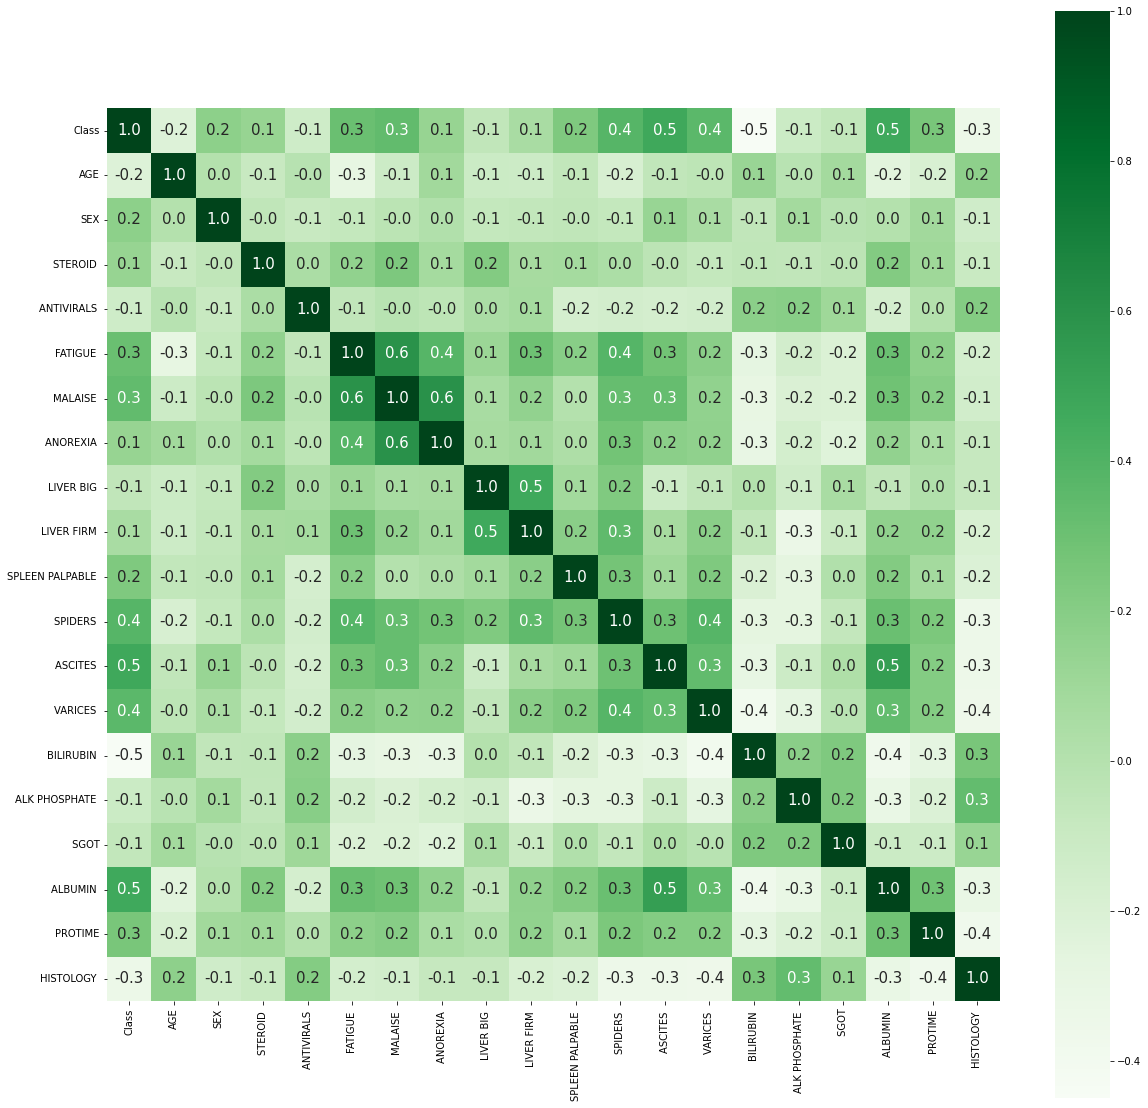

In [334]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

<AxesSubplot:>

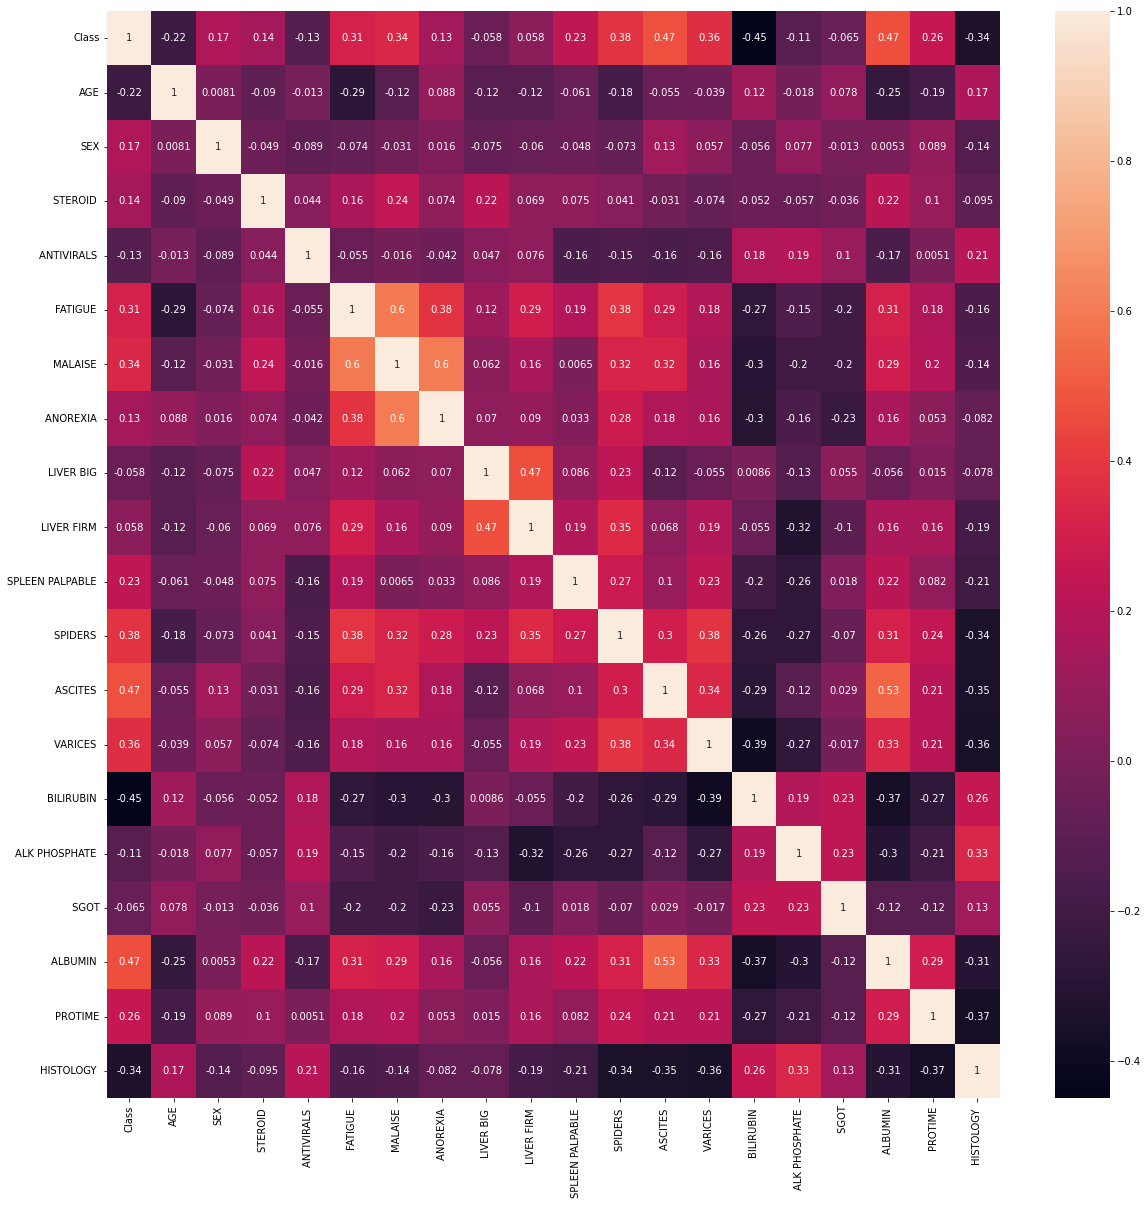

In [335]:
import seaborn as sb

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

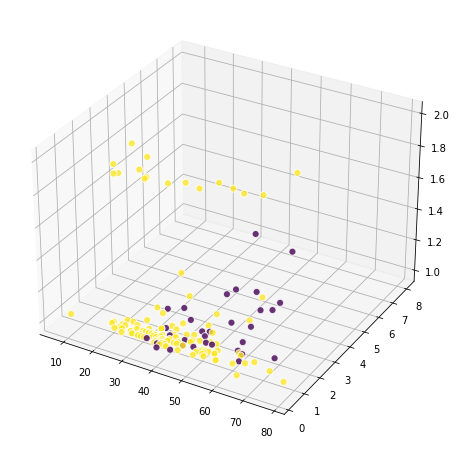

In [339]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xs = df['AGE']
ys = df['BILIRUBIN ']
zs = df['SEX']

ax.scatter(xs, ys, zs, s=50, alpha=0.8, edgecolors='w',c=df['Class'])

<AxesSubplot:>

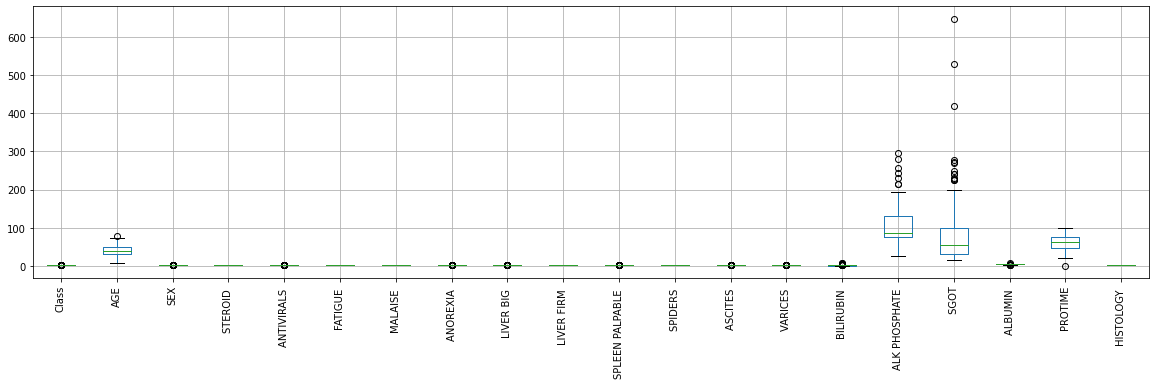

In [340]:
df.boxplot( rot = 90, figsize=(20,5))

<AxesSubplot:>

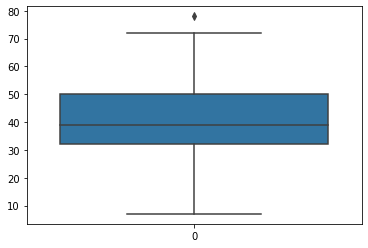

In [341]:
sns.boxplot(df['AGE'])

<AxesSubplot:>

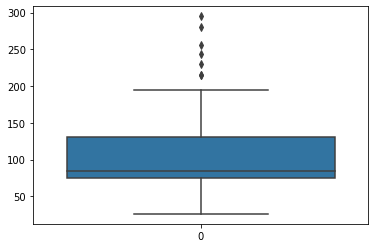

In [342]:
sns.boxplot(df['ALK PHOSPHATE '])

<AxesSubplot:>

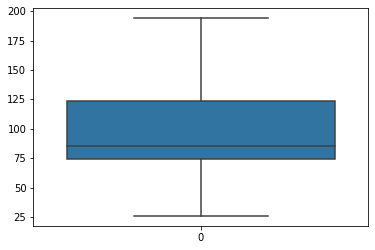

In [346]:
df=df[df['ALK PHOSPHATE ']<201]
sns.boxplot(df['ALK PHOSPHATE '])

<AxesSubplot:>

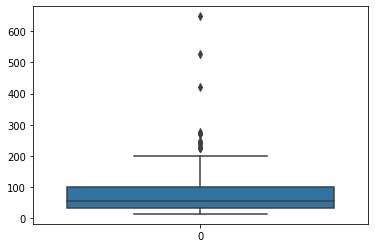

In [344]:
sns.boxplot(df[' SGOT'])

<AxesSubplot:>

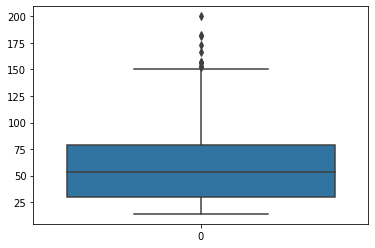

In [347]:
df=df[df[' SGOT']<201]
sns.boxplot(df[' SGOT'])

<AxesSubplot:>

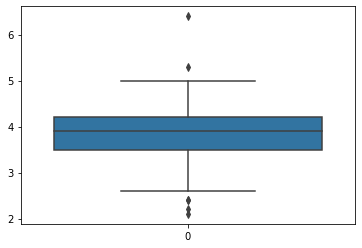

In [345]:
sns.boxplot(df['ALBUMIN '])

In [348]:
df.shape

(136, 20)

In [349]:
from scipy.stats import pearsonr,spearmanr
L=[]
for i in df.columns:
    pearsonCor,_=pearsonr(df[i],df['Class'])
    L.append(pearsonCor)
    print(i,' - pearsonCor={}'.format(pearsonCor))

Class  - pearsonCor=0.9999999999999998
AGE  - pearsonCor=-0.190448332030658
SEX  - pearsonCor=0.16859812311191275
STEROID   - pearsonCor=0.14373407908804992
ANTIVIRALS   - pearsonCor=-0.16166781606521002
FATIGUE   - pearsonCor=0.3474418265789191
MALAISE   - pearsonCor=0.3759986890374602
ANOREXIA   - pearsonCor=0.15643823709834764
LIVER BIG   - pearsonCor=-0.06846270385372022
LIVER FIRM   - pearsonCor=0.07139215614635319
SPLEEN PALPABLE   - pearsonCor=0.2736795548697596
SPIDERS   - pearsonCor=0.4544386720364927
ASCITES   - pearsonCor=0.4906579764621285
VARICES   - pearsonCor=0.4379982986663978
BILIRUBIN   - pearsonCor=-0.4941004843119592
ALK PHOSPHATE   - pearsonCor=-0.0987024049049377
 SGOT  - pearsonCor=-0.08041876853272382
ALBUMIN   - pearsonCor=0.49017834245398745
PROTIME  - pearsonCor=0.29778050241785775
HISTOLOGY   - pearsonCor=-0.3908076859598957


In [352]:
L.sort(reverse=True)
L

[0.9999999999999998,
 0.4906579764621285,
 0.49017834245398745,
 0.4544386720364927,
 0.4379982986663978,
 0.3759986890374602,
 0.3474418265789191,
 0.29778050241785775,
 0.2736795548697596,
 0.16859812311191275,
 0.15643823709834764,
 0.14373407908804992,
 0.07139215614635319,
 -0.06846270385372022,
 -0.08041876853272382,
 -0.0987024049049377,
 -0.16166781606521002,
 -0.190448332030658,
 -0.3908076859598957,
 -0.4941004843119592]

In [353]:
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.5)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Class                0.000
AGE                 18.250
SEX                  0.000
STEROID              1.000
ANTIVIRALS           0.000
FATIGUE              1.000
MALAISE              1.000
ANOREXIA             0.000
LIVER BIG            0.000
LIVER FIRM           1.000
SPLEEN PALPABLE      0.000
SPIDERS              1.000
ASCITES              0.000
VARICES              0.000
BILIRUBIN            0.700
ALK PHOSPHATE       45.750
 SGOT               48.500
ALBUMIN              0.625
PROTIME             29.500
HISTOLOGY            1.000
dtype: float64

In [354]:
#show outlier data
Upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))

     Class    AGE    SEX  STEROID   ANTIVIRALS   FATIGUE   MALAISE   \
0    False  False   True     False        False     False     False   
1    False  False  False     False        False     False     False   
2    False   True  False     False        False     False     False   
3    False  False  False     False         True     False     False   
4    False  False  False     False        False     False     False   
..     ...    ...    ...       ...          ...       ...       ...   
149  False  False  False     False        False     False     False   
151  False  False  False     False        False     False     False   
152  False  False  False     False        False     False     False   
153  False  False   True     False        False     False     False   
154   True  False  False     False        False     False     False   

     ANOREXIA   LIVER BIG   LIVER FIRM   SPLEEN PALPABLE   SPIDERS   ASCITES   \
0        False        True        False             False     Fals

In [355]:
from sklearn.preprocessing import scale,StandardScaler,normalize,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

ardata=normalize(df,norm='l2',axis=0)
ardata = StandardScaler().fit(ardata).transform(ardata)
#ardata=MinMaxScaler(feature_range=(0,1)).fit_transform(ardata)
DFdata=pd.DataFrame(ardata,columns=df.columns)
labels = DFdata['Class']
data=DFdata.drop('Class',axis=1)
labels = label_encoder.fit_transform(labels)

In [356]:
from sklearn.linear_model import Lasso

ls=Lasso(alpha=0.1,normalize=True)
ls.fit(data,labels)

z=ls.coef_
z

array([-0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0., -0.,  0.,  0., -0.])

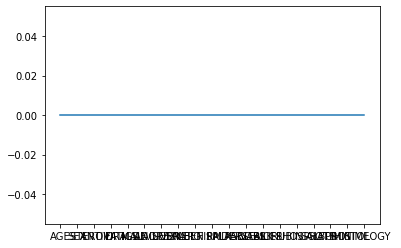

In [357]:
plt.plot(data.columns,z)
plt.show()

In [358]:
X = data  
y = labels

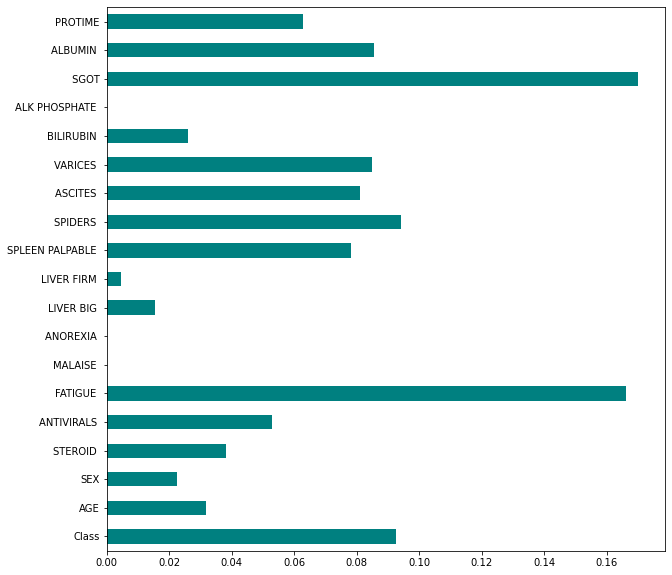

In [359]:
from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(X,y)
feat_importances=pd.Series(importance,df.columns[0:len(df.columns)-1])
plt.figure(figsize=(10,10))
feat_importances.plot(kind='barh',color='teal')
plt.show()

In [360]:
feat_importances

Class               0.092664
AGE                 0.031888
SEX                 0.022519
STEROID             0.037989
ANTIVIRALS          0.052999
FATIGUE             0.166145
MALAISE             0.000000
ANOREXIA            0.000000
LIVER BIG           0.015277
LIVER FIRM          0.004505
SPLEEN PALPABLE     0.078067
SPIDERS             0.094100
ASCITES             0.080880
VARICES             0.084884
BILIRUBIN           0.025969
ALK PHOSPHATE       0.000000
 SGOT               0.170053
ALBUMIN             0.085566
PROTIME             0.062688
dtype: float64

In [361]:
L=list(feat_importances)
L.sort(reverse=True)
L

[0.17005275181773616,
 0.16614521081893807,
 0.09409980675585028,
 0.0926635686940056,
 0.0855661412879114,
 0.08488406148508965,
 0.08087975591973828,
 0.07806686274646268,
 0.06268773605192046,
 0.05299889282789838,
 0.03798933130582505,
 0.031887520158815796,
 0.02596889515817269,
 0.02251919132118041,
 0.01527728698106956,
 0.004505097144916537,
 0.0,
 0.0,
 0.0]

In [362]:
df.columns

Index(['Class', 'AGE', 'SEX', 'STEROID ', 'ANTIVIRALS ', 'FATIGUE ',
       'MALAISE ', 'ANOREXIA ', 'LIVER BIG ', 'LIVER FIRM ',
       'SPLEEN PALPABLE ', 'SPIDERS ', 'ASCITES ', 'VARICES ', 'BILIRUBIN ',
       'ALK PHOSPHATE ', ' SGOT', 'ALBUMIN ', 'PROTIME', 'HISTOLOGY '],
      dtype='object')

In [364]:
data=df[[' SGOT','FATIGUE ','SPIDERS ','ALBUMIN ','VARICES ','ASCITES ']]

In [365]:
X=data

In [366]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(108, 6)
(28, 6)
(108,)
(28,)


In [367]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [368]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import RFE

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

#from sklearn.linear_model import LogisticRegression
tree=DecisionTreeClassifier()
rfe = RFE(tree,n_features_to_select=2, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
tree.fit(X_train_rfe,y_train)
y_predict=tree.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.9814814814814815 
 MAE  =0.018518518518518517 
 confusion_matrix=
[[23  0]
 [ 2 83]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.98      0.99        85

    accuracy                           0.98       108
   macro avg       0.96      0.99      0.97       108
weighted avg       0.98      0.98      0.98       108



In [369]:
from sklearn.linear_model import LogisticRegression

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
lr=LogisticRegression(C=0.1, solver='liblinear')
rfe = RFE(lr,n_features_to_select=5, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
lr.fit(X_train_rfe,y_train)
y_predict=lr.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.8425925925925926 
 MAE  =0.1574074074074074 
 confusion_matrix=
[[13 10]
 [ 7 78]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.65      0.57      0.60        23
           1       0.89      0.92      0.90        85

    accuracy                           0.84       108
   macro avg       0.77      0.74      0.75       108
weighted avg       0.84      0.84      0.84       108



In [371]:
from sklearn.feature_selection import RFE
from sklearn import svm

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

nb = svm.SVC(kernel='rbf')
nb.fit(X_train, y_train) 

rfe = RFE(nb,n_features_to_select=6, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
nb.fit(X_train_rfe,y_train)
y_predict=nb.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.8981481481481481 
 MAE  =0.10185185185185185 
 confusion_matrix=
[[16  7]
 [ 4 81]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.80      0.70      0.74        23
           1       0.92      0.95      0.94        85

    accuracy                           0.90       108
   macro avg       0.86      0.82      0.84       108
weighted avg       0.89      0.90      0.90       108



In [373]:
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

classifier = GaussianNB() 

rfe = RFE(classifier,n_features_to_select=6, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
classifier.fit(X_train_rfe,y_train)
y_predict=classifier.predict(X_train_rfe)

from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.8611111111111112 
 MAE  =0.1388888888888889 
 confusion_matrix=
[[15  8]
 [ 7 78]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.68      0.65      0.67        23
           1       0.91      0.92      0.91        85

    accuracy                           0.86       108
   macro avg       0.79      0.78      0.79       108
weighted avg       0.86      0.86      0.86       108



In [374]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,100):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    Result=model.score(X_test,y_test)
    print(f"neighbors : {i} , score : {Result}")

neighbors : 1 , score : 0.7142857142857143
neighbors : 2 , score : 0.7142857142857143
neighbors : 3 , score : 0.8214285714285714
neighbors : 4 , score : 0.8214285714285714
neighbors : 5 , score : 0.8571428571428571
neighbors : 6 , score : 0.8214285714285714
neighbors : 7 , score : 0.8928571428571429
neighbors : 8 , score : 0.8928571428571429
neighbors : 9 , score : 0.8928571428571429
neighbors : 10 , score : 0.8928571428571429
neighbors : 11 , score : 0.8928571428571429
neighbors : 12 , score : 0.8928571428571429
neighbors : 13 , score : 0.8928571428571429
neighbors : 14 , score : 0.8928571428571429
neighbors : 15 , score : 0.9285714285714286
neighbors : 16 , score : 0.9285714285714286
neighbors : 17 , score : 0.9285714285714286
neighbors : 18 , score : 0.8928571428571429
neighbors : 19 , score : 0.8928571428571429
neighbors : 20 , score : 0.8928571428571429
neighbors : 21 , score : 0.8928571428571429
neighbors : 22 , score : 0.8928571428571429
neighbors : 23 , score : 0.89285714285714

The accuracy of KNN is:  0.93
[[ 2  2]
 [ 0 24]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.92      1.00      0.96        24

    accuracy                           0.93        28
   macro avg       0.96      0.75      0.81        28
weighted avg       0.93      0.93      0.92        28



<AxesSubplot:>

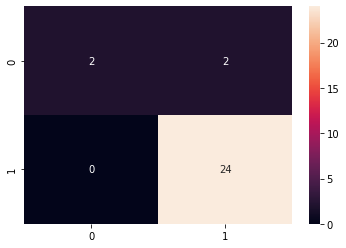

In [375]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
#print('y_predict={} \n y_test  ={}'.format(y_pred,y_test))
ac = accuracy_score(y_test,y_pred)
print('The accuracy of KNN is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))
sns.heatmap(cm,annot=True)

In [376]:
from sklearn.tree import DecisionTreeClassifier

for i in range(1,20):
    classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state=4)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    ac=metrics.accuracy_score(y_test, y_pred)
    print('The accuracy of Decision Tree Classification is: ', round(ac,2),'i=',i)

The accuracy of Decision Tree Classification is:  0.86 i= 1
The accuracy of Decision Tree Classification is:  0.86 i= 2
The accuracy of Decision Tree Classification is:  0.86 i= 3
The accuracy of Decision Tree Classification is:  0.71 i= 4
The accuracy of Decision Tree Classification is:  0.82 i= 5
The accuracy of Decision Tree Classification is:  0.86 i= 6
The accuracy of Decision Tree Classification is:  0.71 i= 7
The accuracy of Decision Tree Classification is:  0.71 i= 8
The accuracy of Decision Tree Classification is:  0.71 i= 9
The accuracy of Decision Tree Classification is:  0.71 i= 10
The accuracy of Decision Tree Classification is:  0.71 i= 11
The accuracy of Decision Tree Classification is:  0.71 i= 12
The accuracy of Decision Tree Classification is:  0.71 i= 13
The accuracy of Decision Tree Classification is:  0.71 i= 14
The accuracy of Decision Tree Classification is:  0.71 i= 15
The accuracy of Decision Tree Classification is:  0.71 i= 16
The accuracy of Decision Tree Cla

The accuracy of Decision Tree Classification is:  0.86
[[ 0  4]
 [ 0 24]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.86      1.00      0.92        24

    accuracy                           0.86        28
   macro avg       0.43      0.50      0.46        28
weighted avg       0.73      0.86      0.79        28



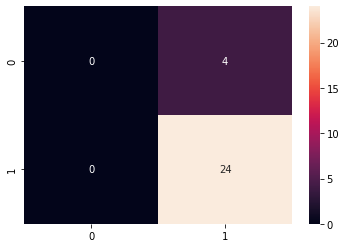

In [377]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
ac=metrics.accuracy_score(y_test, y_pred)
print('The accuracy of Decision Tree Classification is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

The accuracy of Logistic Regression is:  0.86
[[ 2  2]
 [ 2 22]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.92      0.92      0.92        24

    accuracy                           0.86        28
   macro avg       0.71      0.71      0.71        28
weighted avg       0.86      0.86      0.86        28



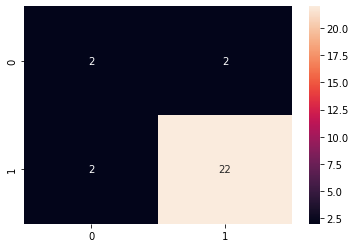

In [378]:
# Classification LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.9, solver='liblinear').fit(X_train,y_train)
y_pred = LR.predict(X_test)
ac=metrics.accuracy_score(y_test, y_pred)
print('The accuracy of Logistic Regression is: ', round(ac,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

Accuracy of the SVM Model:  0.86
[[ 1  3]
 [ 1 23]]
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.88      0.96      0.92        24

    accuracy                           0.86        28
   macro avg       0.69      0.60      0.63        28
weighted avg       0.83      0.86      0.84        28



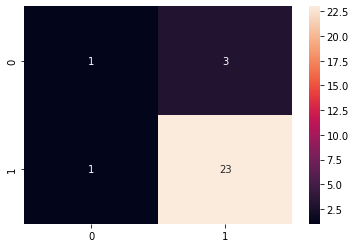

In [379]:
# Classification SVM
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM Model: ",round(accuracy,2))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

The accuracy of Naive bayes is:  0.8214285714285714
[[ 2  2]
 [ 3 21]]
              precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.91      0.88      0.89        24

    accuracy                           0.82        28
   macro avg       0.66      0.69      0.67        28
weighted avg       0.84      0.82      0.83        28



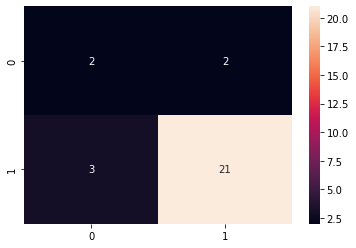

In [380]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('The accuracy of Naive bayes is: ', ac)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))